# Clustering Jerarquico
* X dataset (n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

* a : distribución normal entorno a 10 en eje 'x' y 0 en 'y' con una desviación típica de 3 horizontal y 4 vertical
* a : distribución normal entorno a 0 en eje 'x' y 20 en 'y' con una desviación típica de 3 horizontal y 4 vertical

(150, 2)


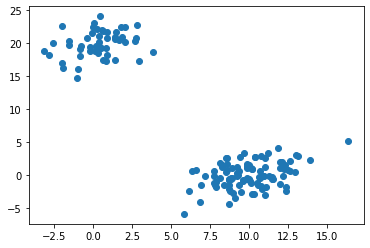

In [7]:
#datos aleatorios
np.random.seed(4711)
#distribución normal en varias dimensiones
a = np.random.multivariate_normal([10, 0], [[3,1], [1,4]], size = [100, ])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
#concatenamos a con b
X = np.concatenate((a,b))
print(X.shape)
#graficar todas las filas de X en la primera y segunda columna respectivamente
plt.scatter(X[:,0], X[:,1])
plt.show()

### Matriz de enlace
* Z

In [10]:
Z = linkage(X, "ward")

Traemos la función cophenet que nos calcula el coeficiente de correlación cofenética del clustering.

Función: comparar las distancias de nuestras muestras con las que se llevan a cabo con el clústering jerarquico. Si su valor es cercano a 1, mejor será el clustering.

In [12]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

pdist calcula la distancia original de los datos

In [13]:
c, coph_distance = cophenet(Z, pdist(X))

In [20]:
print("Porcentaje: "+str(c * 100)+"%")

Porcentaje: 98.00148387574268%


interpretación de la primer array de la matriz Z: el punto 52 y el 53 son los más cercanos a la distancia de 0.0415 y generó un cluster de 2 elementos

In [19]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

Clasificación de columnas: punto 1, punto 2, distancia, cantidad de elemenos en el cluster

Las primeras dos columnas representan el número del cluster relacionado con su posición en a y b. Si el valor es mayor al tamaño de X, entonces fue un elemento k creado automáticamente por linkage() y representa el elemento Z[k-len(X)]

In [26]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Dado la fila [6.20000000e+01, 1.52000000e+02, 1.72599535e-01, 3.00000000e+00], tomando k = 152 se tiene que

In [25]:
print(Z[152-len(X)])

[33.         68.          0.07106779  2.        ]


Y dado [33, 68, 0.07106779, 2] podemos concluir que los puntos X[[33, 62, 68]] son muy similares con respecto a los demás dentro del conjunto universo.

In [27]:
X[[33, 62, 68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

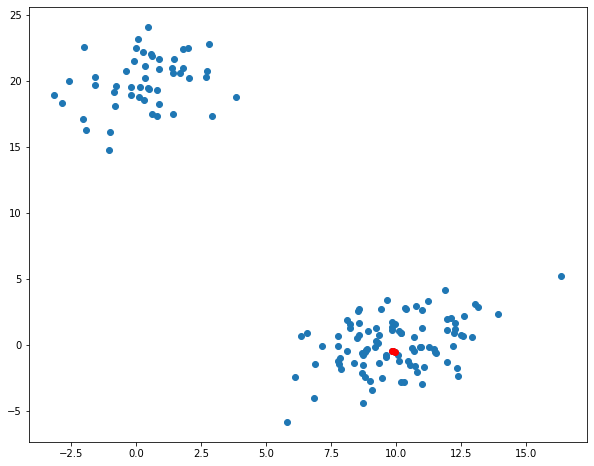

In [28]:
idx = [33, 62, 68]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1]) #pintamos todos los puntos
plt.scatter(X[idx, 0], X[idx,1], c='r') #resaltamos todos los puntos dentro del cluster en rojo
plt.show()

### Representación gráfica de un dendrograma

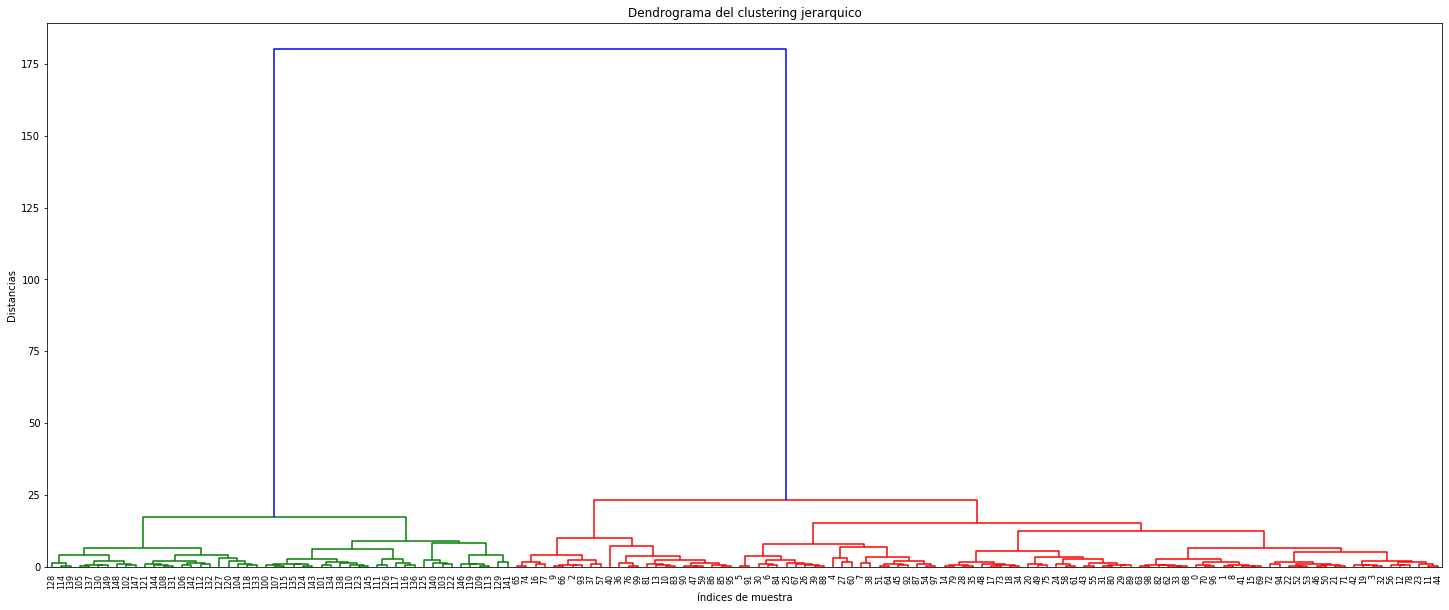

In [32]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerarquico")
plt.xlabel("índices de muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold= 0.3*180) #clasifica por colores por defecto el 70% de la distancia total
#es decir aprox 0.7 * 180
plt.show()

In [35]:
Z[-1:,][0][2]

180.27043021047612

### dendrograma truncado

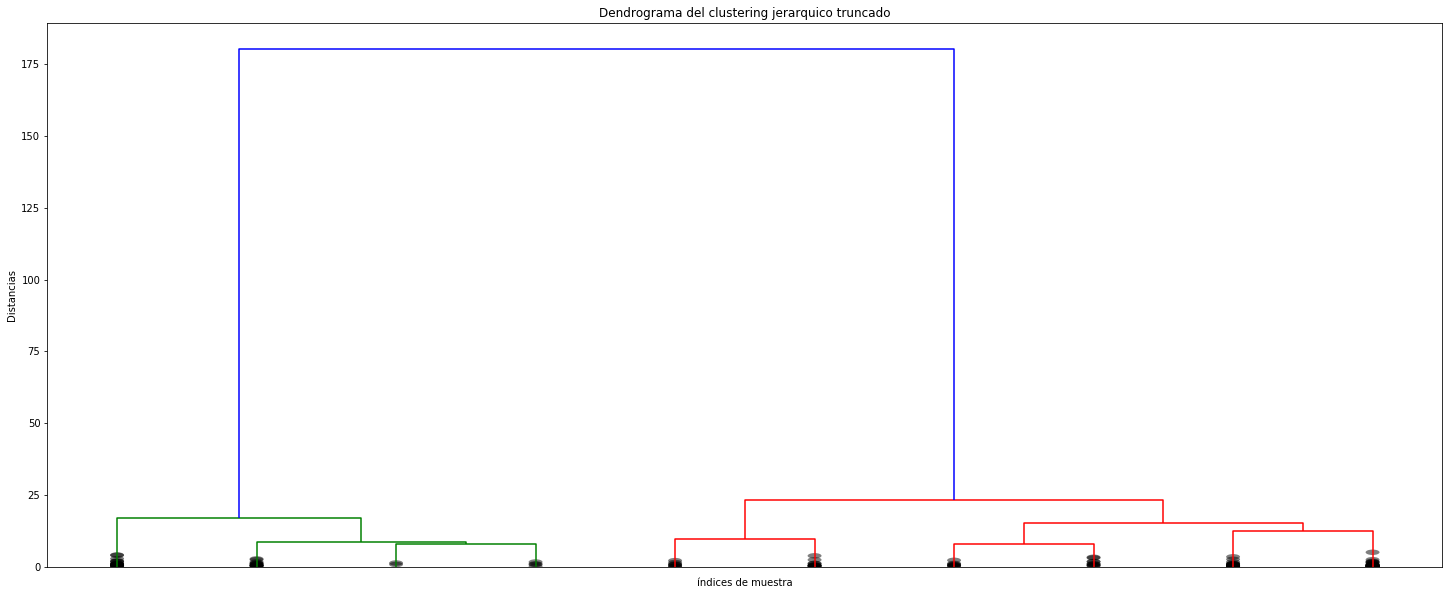

In [38]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerarquico truncado")
plt.xlabel("índices de muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold= 0.3*180, truncate_mode="lastp", p=10, show_leaf_counts=False, show_contracted=True) 
#Trunca por los últimos p elementos
#es decir aprox 0.7 * 180
plt.show()

### Dendrograma mejorado

In [40]:
def dendrogram2(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k') #Marca un umbral dentro del eje y si se especifica
        
    return ddata

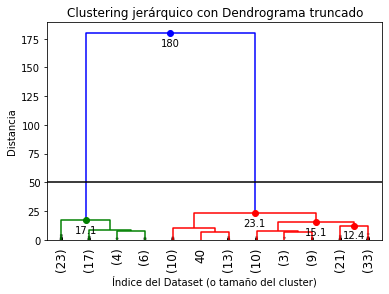

In [42]:
dendrogram2(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True,annotate_above=10, max_d=50)
plt.show()